In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
Days=1


In [9]:
stocks =  pd.read_csv('stocks_data.csv')
sentament = pd.read_csv('reddit_stock_data_sentiment.csv')

In [ ]:
# score_list = [] 

# for i in range(len(sentament)):
#     score = 0  
#     valid_days = 0  
#     for x in range(Days):
#         if i + x < len(sentament):
#             score += sentament[i + x]['sentiment_score']
#             valid_days += 1
#     if valid_days > 0:
#         avg_score = score / valid_days
#     else:
#         avg_score = 0  
#     sentament[i]['sentiment_score'] = avg_score 
#     if i < len(sentiment_score):
#         sentament[i]['sentiment_score'] = stocks.loc[i, 'sentiment_score'] 

In [27]:
from datetime import datetime, timedelta

# Adjust the date in 'created_utc' to the next day
sentament['created_utc_next_day'] = sentament['created_utc'].apply(
    lambda x: (datetime.strptime(x.split(' ')[0], '%Y-%m-%d') + timedelta(days=1)).strftime('%Y-%m-%d')
)

# Update the 'stock' column to match with the day after
sentament['stock'] = sentament.apply(
    lambda row: stocks.loc[stocks['Date'] == row['created_utc_next_day'], row['mentioned_tickers']].values[0]
    if row['mentioned_tickers'] in stocks.columns and not stocks.loc[stocks['Date'] == row['created_utc_next_day'], row['mentioned_tickers']].empty
    else None,
    axis=1
)

sentament.head(100)

,subreddit,title,clean_title,id,author,created_utc,score,upvote_ratio,num_comments,url,...,post_sentiment_finbert,title_weight,post_weight,vader_score,finbert_score,sentiment_score,sentiment_normalized,sentiment_category,stock,created_utc_next_day
0,wallstreetbets,Can Newly Released NVIDIA Dynamo Open Source R...,Newly Released NVIDIA Dynamo Open Source Reaso...,1jed83g,Antonia45Heath,2025-03-18 15:16:09,2,1.00,3,https://www.reddit.com/r/wallstreetbets/commen...,...,0.000000,0.75,0.25,0.619825,0.000000,0.309912,65.495625,positive,2.089996,2025-03-19
3,wallstreetbets,TSLA puts gains. Time to go buy a Tesla.,TSLA puts gains. Time go buy Tesla.,1jebn8s,brokenb3ar,2025-03-18 14:12:35,9,0.56,18,https://i.redd.it/iuy8iwpiohpe1.jpeg,...,0.000000,1.00,0.00,0.340000,0.000000,0.170000,58.500000,positive,10.550003,2025-03-19
6,wallstreetbets,NVDA GTC YOLO,NVDA GTC YOLO,1je9lr3,WingWorried6176,2025-03-18 12:50:27,25,0.86,26,https://www.reddit.com/gallery/1je9lr3,...,0.000000,0.75,0.25,0.247325,0.000000,0.309185,56.183125,positive,2.089996,2025-03-19
10,wallstreetbets,TSLA puts 20k$ gain,TSLA puts 20k$ gain,1je8owy,TerraDeaGenesis,2025-03-18 12:13:02,197,0.96,11,https://www.reddit.com/gallery/1je8owy,...,0.780357,0.75,0.25,0.619325,0.195089,0.170927,70.360358,positive,10.550003,2025-03-19
18,wallstreetbets,"$90,000 YOLO into TSLA $225P 3DTE","$90,000 YOLO TSLA $225P 3DTE",1je54f3,NOSjoker21,2025-03-18 09:36:49,634,0.97,142,https://i.redd.it/hbgl726bbgpe1.png,...,0.000000,0.75,0.25,0.320850,0.000000,0.171779,58.021250,positive,10.550003,2025-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,stocks,Meta begins testing its first in-house AI trai...,Meta begins testing first in-house AI training...,1j8r6gq,zainlikesmoney,2025-03-11 09:49:04,6,0.69,0,https://www.reddit.com/r/stocks/comments/1j8r6...,...,0.000000,0.75,0.25,0.100475,0.000000,0.125508,52.511875,neutral,6.989998,2025-03-12
1031,stocks,These are the stocks on my watchlist (03/11),stocks watchlist (03/11),1j8qi84,WinningWatchlist,2025-03-11 09:17:11,0,0.41,4,https://www.reddit.com/r/stocks/comments/1j8qi...,...,0.000000,0.75,0.25,-0.247675,0.000000,-0.123838,43.808125,negative,NaN,2025-03-12
1037,stocks,I want to understand how the US stock market w...,want understand US stock market works,1j8msy7,AppleDJ,2025-03-11 05:27:34,4,0.61,23,https://www.reddit.com/r/stocks/comments/1j8ms...,...,0.000000,0.75,0.25,0.235300,0.000000,0.143796,55.882500,positive,17.509995,2025-03-12
1038,stocks,Trumps tariffs. Which companies might avoid pain?,Trumps tariffs. companies might avoid pain?,1j8mhqn,AnimateDuckling,2025-03-11 05:03:42,4,0.58,47,https://www.reddit.com/r/stocks/comments/1j8mh...,...,0.000000,0.75,0.25,-0.268700,0.000000,0.131953,43.282500,negative,6.989998,2025-03-12


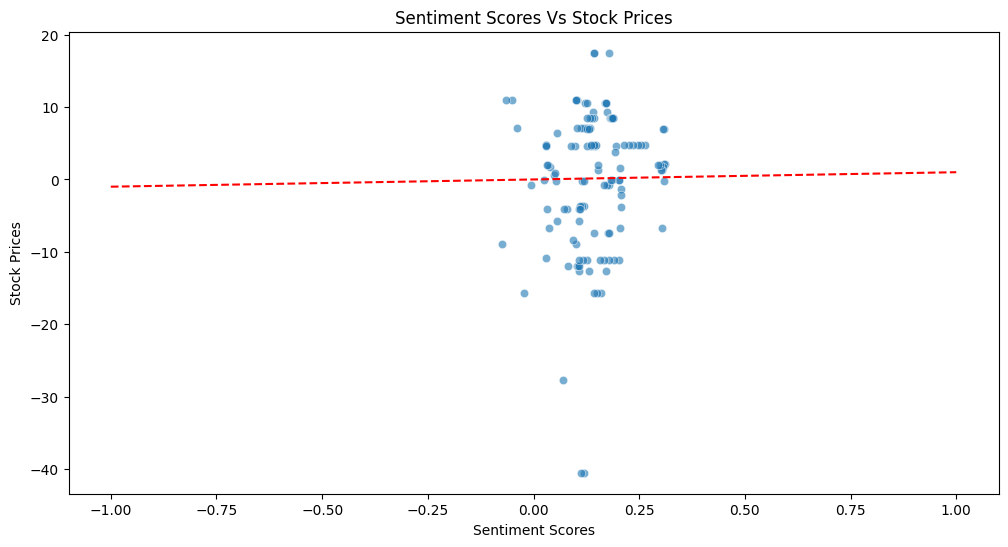

In [26]:
df = sentament[['sentiment_score', 'stock']].dropna()  # Drop rows with NaN values
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sentiment_score', y='stock', data=df, alpha=0.6)
plt.title('Sentiment Scores Vs Stock Prices')
plt.xlabel('Sentiment Scores')
plt.ylabel('Stock Prices')
plt.plot([-1, 1], [-1, 1], 'r--')  # Add a reference line
plt.show()